In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [58]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [59]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [60]:
df_filtered = df[["engine_displacement","horsepower","vehicle_weight","model_year","fuel_efficiency_mpg"]]

In [61]:
df_filtered

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


### EDA

In [62]:
df_filtered.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')

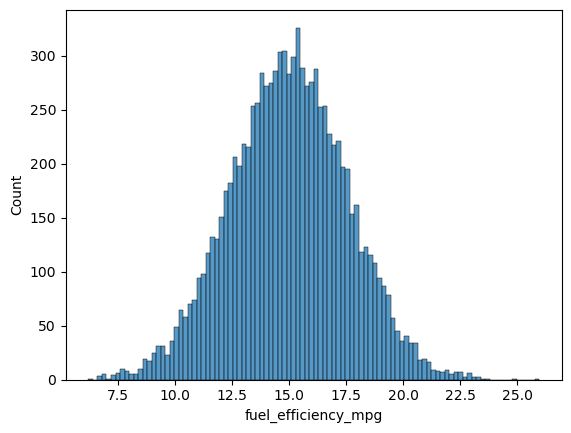

In [63]:
sns.histplot(df_filtered['fuel_efficiency_mpg'],bins=100)
plt.show()

### No it does not have long tail.

### Question 1 ) There's one column with missing values. What is it?

In [64]:
df_filtered.isna().sum()


engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Column is horsepower

### Question 2) 

### What's the median (50% percentile) for variable 'horsepower'?

In [65]:
hp = df_filtered['horsepower'].dropna()


In [66]:
np.median(hp)

np.float64(149.0)

### Answer is 149

### Prepare and split the dataset

In [156]:
n = len(df_filtered)
n_val = int(n*.2)
n_test = int(n*.2)
n_train = int(n*.6)


In [157]:
n_train, n_val, n_test

(5822, 1940, 1940)

In [158]:
df_train = df_filtered.iloc[:n_train]
df_val = df_filtered.iloc[n_train:n_train+n_val]
df_test = df_filtered.iloc[n_train + n_val :]
#now shuffle


In [159]:
idx = np.arange(n)

In [160]:
np.random.seed(42) 
np.random.shuffle(idx)

In [161]:
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270])

In [162]:
df_train = df_filtered.iloc[idx[:n_train]].copy()
df_val = df_filtered.iloc[idx[n_train:n_train + n_val]].copy()
df_test = df_filtered.iloc[idx[n_train + n_val:]].copy()

In [163]:
y_train = df_train["fuel_efficiency_mpg"].values
y_val = df_val["fuel_efficiency_mpg"].values
y_test = df_test["fuel_efficiency_mpg"].values

In [164]:
del df_train["fuel_efficiency_mpg"]
del df_val["fuel_efficiency_mpg"]
del df_test["fuel_efficiency_mpg"]

### Question 3)

In [110]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [111]:
df_filtered.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

In [112]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']

In [113]:
X_train = df_train[base].values

In [114]:
df_train[base].isna().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [115]:
def rmse(y,y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

### With 0

In [116]:
train_linear_regression(X_train,y_train)

(np.float64(nan), array([nan, nan, nan, nan]))

In [117]:
X_train_0 = df_train[base].fillna(0).values

In [118]:
X_train_0

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 260.        ,  139.        , 2606.9729844 , 2009.        ],
       [ 280.        ,  132.        , 4004.21432295, 2014.        ],
       [ 210.        ,  152.        , 2500.17568746, 2020.        ]])

In [119]:
w0,w = train_linear_regression(X_train_0,y_train)

In [120]:
y_pred = w0 + X_train_0.dot(w)

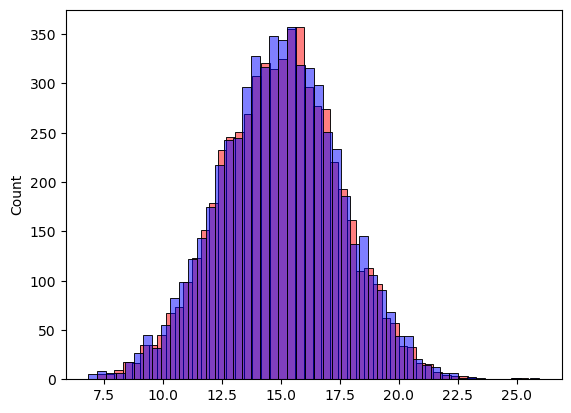

In [121]:
sns.histplot(y_pred,color='Red',bins=50,alpha=0.5)
sns.histplot(y_train,color='Blue',bins=50,alpha=0.5)
plt.show()

In [122]:
round(rmse(y_train,y_pred),2)

np.float64(0.52)

## With mean

In [123]:
mean_horsepower = df_train['horsepower'].mean()


In [124]:
# Fill missing values with the mean
X_train_mean = df_train[base].fillna(mean_horsepower).values

In [125]:
w0, w = train_linear_regression(X_train_mean, y_train)

In [126]:
y_pred_mean = w0 + X_train_mean.dot(w)

In [127]:
round(rmse(y_train, y_pred_mean), 2)

np.float64(0.46)

## Hence With 0 option gives Better RMSE.

## Question 4)
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?

In [128]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [129]:
X_train_0 = df_train[base].fillna(0).values

In [130]:
X_val_0 = df_val[base].fillna(0).values

In [144]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
best_rmse = float('inf')
best_r = None

for r in r_values:
    w0, w = train_linear_regression_reg(X_train_0, y_train, r)
    
    y_pred_val = w0 + X_val_0.dot(w)

    rmse_val = rmse(y_val,y_pred_val)
    
    # Keep track of the best r and RMSE
    if rmse_val < best_rmse:
        best_rmse = rmse_val
        best_r = r

print(f"Best r is {best_r} with RMSE {round(best_rmse, 2)}")


Best r is 0.01 with RMSE 0.52


## Answer is 0.01

## Question 5) 
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))

In [145]:
seed_values = range(10)
rmse_scores = []

In [149]:
for seed in seed_values:
    np.random.seed(seed)
    w0,w = train_linear_regression(X_train_0,y_train)
    y_pred_val = w0 + X_val_0.dot(w)

    # Calculate RMSE
    rmse_val = rmse(y_val, y_pred_val)

    # Collect RMSE scores
    rmse_scores.append(rmse_val)

In [150]:
std_rmse = np.std(rmse_scores)

In [152]:
std_rmse

np.float64(1.1102230246251565e-16)

In [153]:
round(std_rmse, 3)

np.float64(0.0)

## Answer is 0.001

## Question 6)
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?

In [174]:
X_train_val = pd.concat([df_train[base], df_val[base]], axis=0)  
y_train_val = np.concatenate([y_train, y_val]) 

# Step 3: Fill missing values with 0
X_train_val_0 = X_train_val.fillna(0).values
X_test_0 = df_test[base].fillna(0).values

In [175]:
w0, w = train_linear_regression_reg(X_train_val_0, y_train_val, r=0.001)

In [176]:
y_pred_test = w0 + X_test_0.dot(w)

In [177]:
rmse_test = rmse(y_test, y_pred_test)

In [178]:
rmse_test

np.float64(0.5165174215194456)

## Answer is 0.515